In [1]:
%cd code

/opt/ml/code


In [2]:
from load_data import *
import pandas as pd

train_ori = load_data("../input/data/train/train.tsv")
print(train_ori)
boddin_add = pd.read_csv("../input/data/train/all+bodi.tsv", delimiter='\t')
print(boddin_add)
boddin_add=boddin_add.sample(frac=1).reset_index(drop=True)
print(boddin_add)

                                               sentence entity_01  \
0     영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...      랜드로버   
1     선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...       민주당   
2     유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...  유럽 축구 연맹   
3     용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...       강수일   
4     람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...       람캄행   
...                                                 ...       ...   
8995  2002년 FIFA 월드컵 사우디아라비아와의 1차전에서 독일은 8-0으로 승리하였는...   사우디아라비아   
8996  일본의 2대 메이커인 토요타와 닛산은 시장 점유율을 높이기 위한 신차 개발을 계속하...       토요타   
8997  방호의의 손자 방덕룡(方德龍)은 1588년(선조 21년) 무과에 급제하고 낙안군수로...       방덕룡   
8998  LG전자는 올해 초 국내시장에 출시한 2020년형 ‘LG 그램’ 시리즈를 이달부터 ...      LG전자   
8999  전남도의회 안전건설소방위원회 차영수 의원(강진1)은 지난 14일 설 명절을 앞두고 ...       차영수   

           entity_02  label  
0                자동차     17  
1                27석      0  
2               UEFA      6  
3                공격수      2  
4          퍼쿤 씨 인트라팃 

In [3]:
print(train_ori.groupby('label').count())
print(boddin_add.groupby('label').count())

       sentence  entity_01  entity_02
label                                
0          4438       4438       4438
1            92         92         92
2           553        553        553
3            44         44         44
4           679        679        679
5           186        186        186
6           231        231        231
7           209        209        209
8           164        164        164
9           115        115        115
10          815        815        815
11           58         58         58
12           45         45         45
13           11         11         11
14           45         45         45
15          335        335        335
16           23         23         23
17          169        169        169
18            7          7          7
19            4          4          4
20          136        136        136
21           84         84         84
22           56         56         56
23           79         79         79
24          

<AxesSubplot:xlabel='label', ylabel='Count'>

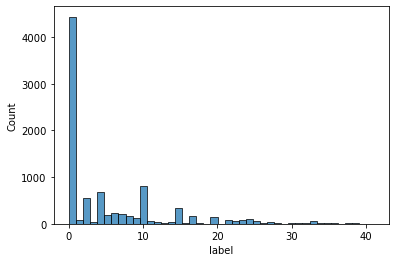

In [4]:
import seaborn as sns

sns.histplot(train_ori['label'])

<AxesSubplot:xlabel='label', ylabel='Count'>

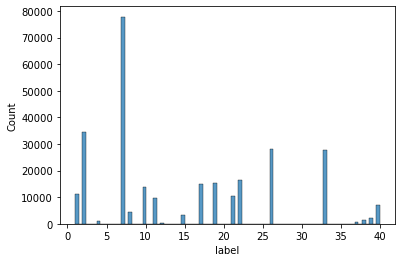

In [5]:
sns.histplot(boddin_add['label'])

       sentence  entity_01  entity_02     ratio     mul
label                                                  
0          4438       4438       4438  0.493111  1775.2
1            92         92         92  0.010222    36.8
2           553        553        553  0.061444   221.2
3            44         44         44  0.004889    17.6
4           679        679        679  0.075444   271.6
5           186        186        186  0.020667    74.4
6           231        231        231  0.025667    92.4
7           209        209        209  0.023222    83.6
8           164        164        164  0.018222    65.6
9           115        115        115  0.012778    46.0
10          815        815        815  0.090556   326.0
11           58         58         58  0.006444    23.2
12           45         45         45  0.005000    18.0
13           11         11         11  0.001222     4.4
14           45         45         45  0.005000    18.0
15          335        335        335  0.037222 

<AxesSubplot:xlabel='label', ylabel='Count'>

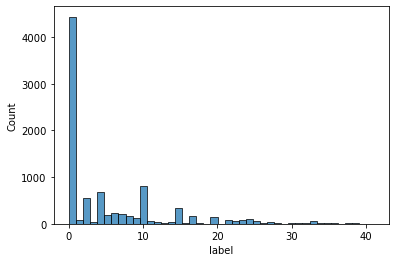

In [6]:
train_ratio = train_ori.groupby('label').count()
train_ratio['ratio'] = train_ratio['sentence'] / len(train_ori)
train_ratio['mul'] = train_ratio['sentence'] * 0.4
print(train_ratio)
sns.histplot(train_ori['label'])

In [7]:
target_countl = list(train_ratio['mul'])

In [8]:
import copy

boddin_add_cut = copy.deepcopy(boddin_add)

In [9]:
def show_hist(boddin_add_cut):
    ratio = boddin_add_cut.groupby('label').count()
    ratio['ratio'] = ratio['sentence'] / len(boddin_add_cut)
    print(ratio)
    sns.histplot(boddin_add_cut['label'])

In [10]:
add_countl = [0] * len(target_countl)
add_list = []

100%|██████████| 280511/280511 [00:28<00:00, 9773.54it/s] 


       sentence  entity_01  entity_02     ratio
label                                          
1         11168      11168      11168  0.040006
2         34393      34393      34393  0.123204
4           603        603        603  0.002160
7         77766      77766      77766  0.278576
8          4500       4500       4500  0.016120
10        13453      13453      13453  0.048192
11         9626       9626       9626  0.034483
12          106        106        106  0.000380
15         3302       3302       3302  0.011829
17        14971      14971      14971  0.053630
19        15400      15400      15400  0.055166
21        10427      10427      10427  0.037352
22        16578      16578      16578  0.059386
26        28033      28033      28033  0.100421
33        27730      27730      27730  0.099335
37          549        549        549  0.001967
38         1583       1583       1583  0.005671
39         2058       2058       2058  0.007372
40         6909       6909       6909  0

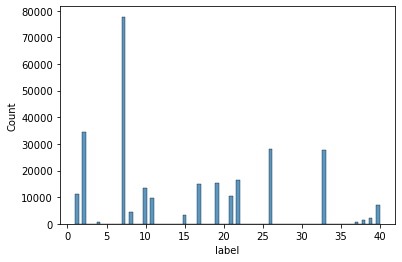

In [11]:
from tqdm import tqdm


delete_list = []
for index, (sentence, entity_01, entity_02, label) in tqdm(boddin_add_cut.iterrows(),total=len(boddin_add_cut)):
    if add_countl[label] < target_countl[label]:
        add_countl[label] += 1
        add_list.append(boddin_add_cut.loc[index])
        delete_list.append(index)
boddin_add_cut = boddin_add_cut.drop(delete_list)

show_hist(boddin_add_cut)

       sentence  entity_01  entity_02     ratio
label                                          
1            37         37         37  0.027286
2           222        222        222  0.163717
4           272        272        272  0.200590
7            84         84         84  0.061947
8            66         66         66  0.048673
10          326        326        326  0.240413
11           24         24         24  0.017699
12           18         18         18  0.013274
15          134        134        134  0.098820
17           68         68         68  0.050147
19            2          2          2  0.001475
21           34         34         34  0.025074
22           23         23         23  0.016962
26            4          4          4  0.002950
33           27         27         27  0.019912
37            2          2          2  0.001475
38            8          8          8  0.005900
39            4          4          4  0.002950
40            1          1          1  0

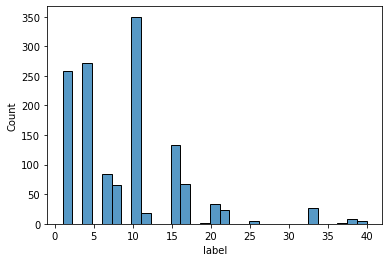

In [12]:
show_hist(pd.DataFrame(add_list))

In [13]:
boddin_add_cut = pd.DataFrame(add_list)
boddin_add_cut.to_csv('../input/data/train/all+bodi_5.tsv', index=False, sep='\t')

In [14]:
train_boddin_add_cut = pd.concat([train_ori,boddin_add_cut])
train_boddin_add_cut.to_csv('../input/data/train/train+all+bodi_5.tsv', index=False, sep='\t')

In [15]:
train_boddin_add_cut_load = pd.read_csv("../input/data/train/train+all+bodi_5.tsv", delimiter='\t')
train_boddin_add_cut_load

,sentence,entity_01,entity_02,label
0,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,자동차,17
1,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,27석,0
2,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,UEFA,6
3,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,공격수,2
4,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,퍼쿤 씨 인트라팃,8
...,...,...,...,...
10351,하켄크로이츠()는 아돌프 히틀러에 의해 국가사회주의 독일 노동자당의 당기로 제정되었...,아돌프 히틀러,국가사회주의 독일 노동자당,4
10352,"1924년 쑨원의 권유로 중국 국민당에 가입하는 한편, 제1차 국공합작에도 참여해...",쑨원,중국 국민당,4
10353,이후 김영삼에 의해 새로 발탁된 인사들과 함께 신한국당 소장파의 한 사람으로 활동하였다.,김영삼,신한국당,4
10354,1928년부터 1949년까지의 장제스의 중국 국민당 통치 기간에 전장은 장쑤 성의 ...,장제스,중국 국민당,4


In [16]:
train_ori

,sentence,entity_01,entity_02,label
0,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,자동차,17
1,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,27석,0
2,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,UEFA,6
3,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,공격수,2
4,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,퍼쿤 씨 인트라팃,8
...,...,...,...,...
8995,2002년 FIFA 월드컵 사우디아라비아와의 1차전에서 독일은 8-0으로 승리하였는...,사우디아라비아,2002년,0
8996,일본의 2대 메이커인 토요타와 닛산은 시장 점유율을 높이기 위한 신차 개발을 계속하...,토요타,일본,9
8997,방호의의 손자 방덕룡(方德龍)은 1588년(선조 21년) 무과에 급제하고 낙안군수로...,방덕룡,선무원종공신(宣武原從功臣),2
8998,LG전자는 올해 초 국내시장에 출시한 2020년형 ‘LG 그램’ 시리즈를 이달부터 ...,LG전자,북미,0
